# heart_disease ctgan stacking

Training on heart_disease dataset using ctgan model and stacking data

In [4]:
# Imports

from synthesizers import Load
from syntheval import SynthEval
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


Declaring real dataset and splitting into train/test

In [7]:
# Read hearts data
data_real = pd.read_csv("Data\hearts_data.csv")
data_real = data_real.dropna()
gen_method = "ctgan"
target = "target"

In [33]:
# Split hearts data into 80/20 train and test
data_train, data_test = train_test_split(data_real, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv("Data\hearts_train.csv", index=False)
data_test.to_csv("Data\hearts_test.csv", index=False)

In [8]:
data_train = Load("Data\hearts_train.csv")
data_test = Load("Data\hearts_test.csv")

# syn_v1

In [12]:
# Synthesize data
gen_count = data_real.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v1.csv", key="synth")

[2024-05-06T11:00:40.433953+0200][10072][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 60%|█████▉    | 1199/2000 [04:48<03:12,  4.16it/s]


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
1005   63    1                4           130          330   
224    33    1                3           120          298   
798    56    0                4           134          409   
816    77    1                4           125          304   
427    56    1                2           126          166   
...   ...  ...              ...           ...          ...   
1044   58    1                4           125          300   
1095   55    1                2           130          262   
1130   61    1                1           134          234   
860    62    0                4           140          268   
1126   42    1                2           120          295   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
1005                    1            2             132                1   
224                     0            0             185                0   
798                

# syn_v2

In [9]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with real data
data_stack = pd.concat([data_real, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v1.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v1_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v1_test.csv", index=False)


In [17]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v2.csv", key="synth")

[2024-05-06T11:21:10.575194+0200][10072][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 30%|██▉       | 599/2000 [05:03<11:50,  1.97it/s]


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
2121   38    1                3           120          212   
457    61    1                3           120            0   
1738   58    1                4           144          312   
883    44    1                2           120          263   
2279   52    1                2           135          261   
...   ...  ...              ...           ...          ...   
1638   49    0                4           121          252   
1095   55    1                2           130          262   
1130   61    1                1           134          234   
1294   34    1                3           124          228   
860    62    0                4           140          268   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2121                    0            0             169                0   
457                     0            0              80                1   
1738               

# syn_v3

In [10]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v2.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v2.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v2_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v2_test.csv", index=False)


In [19]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v3.csv", key="synth")

[2024-05-06T11:26:15.478608+0200][10072][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 30%|██▉       | 599/2000 [16:08<37:44,  1.62s/it]  


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
624    59    1                4           110          239   
4522   58    1                3           129          266   
4227   47    0                3           128          283   
3135   51    0                3           110          182   
1554   37    1                4           142          186   
...   ...  ...              ...           ...          ...   
4426   40    0                2            91          208   
466    42    1                3           134          240   
3092   42    1                4           131          202   
3772   47    1                4           102          230   
860    62    0                4           140          268   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
624                     0            2             142                1   
4522                    1            0             130                0   
4227               

# syn_v4

In [11]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v3.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v3.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v3_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v3_test.csv", index=False)

In [21]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v4.csv", key="synth")

[2024-05-06T11:42:26.068286+0200][10072][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 20%|█▉        | 399/2000 [21:23<1:25:51,  3.22s/it]


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
2484   61    1                4           180          240   
3016   60    0                3           131          250   
5292   38    0                4           121          265   
7932   61    1                4           116          248   
4734   64    1                4           121            1   
...   ...  ...              ...           ...          ...   
5734   45    1                4           167          235   
5191   44    1                4           142          208   
5390   63    1                1           157          224   
860    62    0                4           140          268   
7270   51    1                4           124          211   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2484                    0            2             162                1   
3016                    0            0             131                0   
5292               

# syn_v5

In [12]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v4.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v4.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v4_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v4_test.csv", index=False)

In [23]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v5.csv", key="synth")

[2024-05-06T12:03:53.814621+0200][10072][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 22%|██▏       | 449/2000 [1:02:18<3:35:13,  8.33s/it]


[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
2006    54    1                3           129            0   
1288    39    1                3           121          245   
18494   56    0                3           121          221   
15527   57    0                2           109          218   
12341   39    1                4           141          227   
...    ...  ...              ...           ...          ...   
11284   60    1                4           141          233   
11964   60    1                4           131          232   
5390    63    1                1           157          224   
860     62    0                4           140          268   
15795   61    0                3           109          221   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2006                     1            0             128                0   
1288                     0            0             151                0   
1849

# stack_v5 - Final stack

In [13]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v5.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v5.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v5_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v5_test.csv", index=False)

# Train on stack_v5 and save as state

In [14]:
# Train stack_v5 and save as state
state_stack_v5 = Load(data_train).Train(plugin=gen_method)

[2024-05-08T09:19:01.870403+0200][2108][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 17%|█▋        | 349/2000 [59:28<4:41:19, 10.22s/it]


# stack_v5 (synth only)

In [15]:
# Remove first 1190 rows, equal to the real data, from stack_v5
data_stack_synth_only = data_stack.iloc[1190:,:]

# Save to csv
data_stack_synth_only.to_csv(f"{gen_method}\hearts_stack_synth_only.csv", index=False)

# Split synth_only stack into 80/20 train and test
data_train, data_test = train_test_split(data_stack_synth_only, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_synth_only_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_synth_only_test.csv", index=False)

# Train on synth_only and save as state

In [16]:
# Train synth_only stack and save as state
state_stack_synth_only = Load(data_train).Train(plugin=gen_method)

[2024-05-08T10:18:45.755452+0200][2108][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 25%|██▍       | 499/2000 [1:11:09<3:34:01,  8.56s/it]


# Generate synth data based on stack_v5

In [17]:
# Synthesize data
gen_count = data_real.shape[0]

state_stack_v5.Generate(count=gen_count).Save(name=f"{gen_method}\stack_v5_syn.csv", key="synth")

[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
22594   51    1                1           148            0   
1510    53    1                4           157          288   
26995   40    1                2           120          234   
14320   46    1                4           110          231   
34943   59    1                4           129          270   
...    ...  ...              ...           ...          ...   
16850   52    1                4           140          157   
6265    41    1                3           108          203   
11284   60    1                4           141          233   
860     62    0                4           140          268   
15795   61    0                3           109          221   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
22594                    0            0             107                1   
1510                     1            0             161                0   
2699

In [18]:
# Read synthesized data
stack_v5_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
stack_v5_syn = stack_v5_syn.iloc[:, 1:]

# Generate synth data based on synth_only

In [19]:
# Synthesize data
gen_count = data_real.shape[0]

state_stack_synth_only.Generate(count=gen_count).Save(name=f"{gen_method}\stack_synth_only_syn.csv", key="synth")

[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
19876   53    0                4           139          253   
6191    52    1                3           112            0   
3687    41    1                4           119          247   
1440    56    1                4           116            0   
28826   41    1                4           130          233   
...    ...  ...              ...           ...          ...   
18040   59    1                4           115            0   
7455    43    1                3           161          194   
12474   60    1                3           128          243   
2050    55    1                4           158          267   
16985   40    1                3           121          240   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
19876                    1            1             171                0   
6191                     0            0             125                0   
3687

In [20]:
# Read synthesized data
stack_synth_only_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
stack_synth_only_syn = stack_synth_only_syn.iloc[:, 1:]

# Eval on syn_1

In [21]:
# Read train and test data (this is base/real train and test data, not the stack data)
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Read syn_v1 data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_real = S.evaluate(data_syn,target,"full_eval")
res_real

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.023825,0.002968,0.976175,0.002968
1,pca_eigval_diff,u,0.052905,NaN,0.947095,NaN
2,pca_eigvec_ang,u,0.181732,NaN,0.942153,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.379164,NaN,0.994255,NaN
5,mutual_inf_diff,u,0.393504,NaN,0.994038,NaN
6,ks_tvd_stat,u,0.077199,0.018163,0.922801,0.018163
7,frac_ks_sigs,u,0.583333,NaN,0.416667,NaN
8,avg_h_dist,u,0.014733,0.004943,0.985267,0.004943
9,avg_pMSE,u,0.016512,0.000739,0.933951,0.002956


# Eval on syn_2

In [22]:
# Read train and test data from stack_v1
data_train = pd.read_csv(f"{gen_method}\hearts_stack_v1_train.csv")
data_test = pd.read_csv(f"{gen_method}\hearts_stack_v1_test.csv")

# Read syn_v2 data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v2.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v1 = S.evaluate(data_syn,target,"full_eval")
res_stack_v1

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.023628,0.002112,0.976372,0.002112
1,pca_eigval_diff,u,0.001329,NaN,0.998671,NaN
2,pca_eigvec_ang,u,0.079519,NaN,0.974688,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.220115,NaN,0.996665,NaN
5,mutual_inf_diff,u,0.380647,NaN,0.994233,NaN
6,ks_tvd_stat,u,0.066580,0.013083,0.933420,0.013083
7,frac_ks_sigs,u,0.666667,NaN,0.333333,NaN
8,avg_h_dist,u,0.017918,0.006508,0.982082,0.006508
9,avg_pMSE,u,0.013365,0.000545,0.946542,0.002182


# Eval on syn_3

In [23]:
# Read train and test data from stack_v2
data_train = pd.read_csv(f"{gen_method}\hearts_stack_v2_train.csv")
data_test = pd.read_csv(f"{gen_method}\hearts_stack_v2_test.csv")

# Read syn_v3 data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v3.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v2 = S.evaluate(data_syn,target,"full_eval")
res_stack_v2

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.018545,0.001414,0.981455,0.001414
1,pca_eigval_diff,u,0.002853,NaN,0.997147,NaN
2,pca_eigvec_ang,u,0.024722,NaN,0.992131,NaN
3,avg_cio,u,0.059634,0.059331,0.059634,0.059331
4,corr_mat_diff,u,0.219769,NaN,0.996670,NaN
5,mutual_inf_diff,u,0.294074,NaN,0.995544,NaN
6,ks_tvd_stat,u,0.060779,0.014824,0.939221,0.014824
7,frac_ks_sigs,u,0.750000,NaN,0.250000,NaN
8,avg_h_dist,u,0.014398,0.004688,0.985602,0.004688
9,avg_pMSE,u,0.018950,0.000207,0.924202,0.000828


# Eval on syn_4

In [24]:
# Read train and test data from stack_v3
data_train = pd.read_csv(f"{gen_method}\hearts_stack_v3_train.csv")
data_test = pd.read_csv(f"{gen_method}\hearts_stack_v3_test.csv")

# Read syn_v4 data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v4.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v3 = S.evaluate(data_syn,target,"full_eval")
res_stack_v3

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.016076,0.000980,0.983924,0.000980
1,pca_eigval_diff,u,0.007950,NaN,0.992050,NaN
2,pca_eigvec_ang,u,0.043481,NaN,0.986159,NaN
3,avg_cio,u,0.349712,0.214155,0.349712,0.214155
4,corr_mat_diff,u,0.175974,NaN,0.997334,NaN
5,mutual_inf_diff,u,0.217925,NaN,0.996698,NaN
6,ks_tvd_stat,u,0.066768,0.024420,0.933232,0.024420
7,frac_ks_sigs,u,0.916667,NaN,0.083333,NaN
8,avg_h_dist,u,0.010660,0.003099,0.989340,0.003099
9,avg_pMSE,u,0.011695,0.000326,0.953221,0.001303


# Eval on syn_5

In [25]:
# Read train and test data from stack_v4
data_train = pd.read_csv(f"{gen_method}\hearts_stack_v4_train.csv")
data_test = pd.read_csv(f"{gen_method}\hearts_stack_v4_test.csv")

# Read syn_v5 data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v5.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v4 = S.evaluate(data_syn,target,"full_eval")
res_stack_v4

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.018345,0.000704,0.981655,0.000704
1,pca_eigval_diff,u,0.017256,NaN,0.982744,NaN
2,pca_eigvec_ang,u,0.061693,NaN,0.980363,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.212965,NaN,0.996773,NaN
5,mutual_inf_diff,u,0.152972,NaN,0.997682,NaN
6,ks_tvd_stat,u,0.065167,0.015931,0.934833,0.015931
7,frac_ks_sigs,u,1.000000,NaN,0.000000,NaN
8,avg_h_dist,u,0.010961,0.003390,0.989039,0.003390
9,avg_pMSE,u,0.008282,0.000111,0.966874,0.000445


# Eval on stack_v5 to real data

This evaluation will be different. We will evaluate the synth data generated based off our training of stack_v5, but we will insert the real_data train and test set, in order to see how close or far the stacked synthetic data compares to the original data.

In [26]:
# Read train and test data from real data
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Read stack_v5_syn data
data_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v5_on_real = S.evaluate(data_syn,target,"full_eval")
res_stack_v5_on_real

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.028973,0.002870,0.971027,0.002870
1,pca_eigval_diff,u,0.027991,NaN,0.972009,NaN
2,pca_eigvec_ang,u,0.205478,NaN,0.934594,NaN
3,avg_cio,u,0.011982,0.011982,0.011982,0.011982
4,corr_mat_diff,u,0.486791,NaN,0.992624,NaN
5,mutual_inf_diff,u,0.765773,NaN,0.988397,NaN
6,ks_tvd_stat,u,0.108707,0.023630,0.891293,0.023630
7,frac_ks_sigs,u,0.750000,NaN,0.250000,NaN
8,avg_h_dist,u,0.023811,0.006785,0.976189,0.006785
9,avg_pMSE,u,0.027622,0.001150,0.889511,0.004601


# Eval on stack_synth_only to real data

We will do the same as above, but with the synth data generated based off our training of stack_synth_only.

In [27]:
# Read train and test data from real data
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Read stack_synth_only_syn data
data_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_synth_only_on_real = S.evaluate(data_syn,target,"full_eval")
res_stack_synth_only_on_real

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.044473,0.002889,0.955527,0.002889
1,pca_eigval_diff,u,0.035591,NaN,0.964409,NaN
2,pca_eigvec_ang,u,0.168512,NaN,0.946361,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.551266,NaN,0.991647,NaN
5,mutual_inf_diff,u,0.786137,NaN,0.988089,NaN
6,ks_tvd_stat,u,0.114520,0.020588,0.885480,0.020588
7,frac_ks_sigs,u,0.833333,NaN,0.166667,NaN
8,avg_h_dist,u,0.030679,0.009649,0.969321,0.009649
9,avg_pMSE,u,0.040499,0.002453,0.838004,0.009814


# Multiple plots for evaluation comparisons

# Evaluating synth stacks over time

In [28]:
eval_results = [res_real, res_stack_v1, res_stack_v2, res_stack_v3, res_stack_v4]
eval_str = ["res_real", "res_stack_v1", "res_stack_v2", "res_stack_v3", "res_stack_v4"]

In [29]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "hit_rate"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["hit_rate", "val"]]

privacy_plot

,eps_identif_risk,att_discl_risk,hit_rate
res_real,0.159664,0.475210,0.000000
res_stack_v1,0.252101,0.488725,0.003676
res_stack_v2,0.080882,0.457213,0.000263
res_stack_v3,0.043986,0.437421,0.000788
res_stack_v4,0.093093,0.437999,0.004005


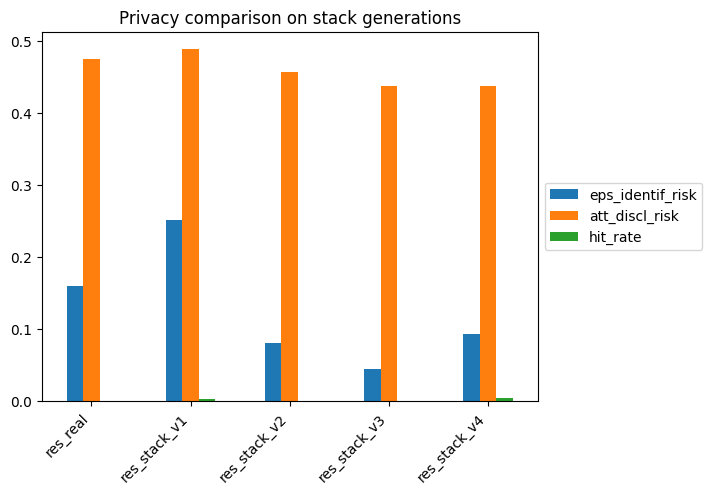

In [30]:
privacy_plot.plot.bar()
plt.title("Privacy comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [31]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "pca_eigval_diff",
                                     "pca_eigvec_ang"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["pca_eigval_diff", "val"],
                                    evals.loc["pca_eigvec_ang", "val"]]

utility_plot

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
res_real,0.023825,0.052905,0.181732
res_stack_v1,0.023628,0.001329,0.079519
res_stack_v2,0.018545,0.002853,0.024722
res_stack_v3,0.016076,0.007950,0.043481
res_stack_v4,0.018345,0.017256,0.061693


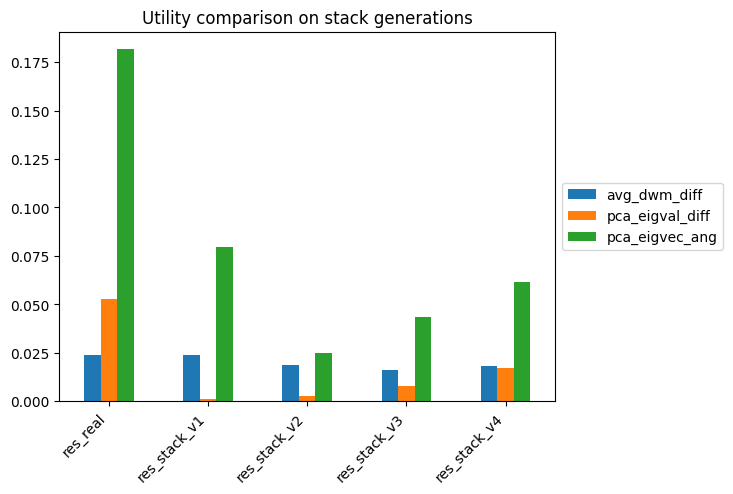

In [32]:
utility_plot.plot.bar()
plt.title("Utility comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [33]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff",
                                     "mutual_inf_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"], 
                                    evals.loc["mutual_inf_diff", "val"]]

matrix_diff_plot

,corr_mat_diff,mutual_inf_diff
res_real,0.379164,0.393504
res_stack_v1,0.220115,0.380647
res_stack_v2,0.219769,0.294074
res_stack_v3,0.175974,0.217925
res_stack_v4,0.212965,0.152972


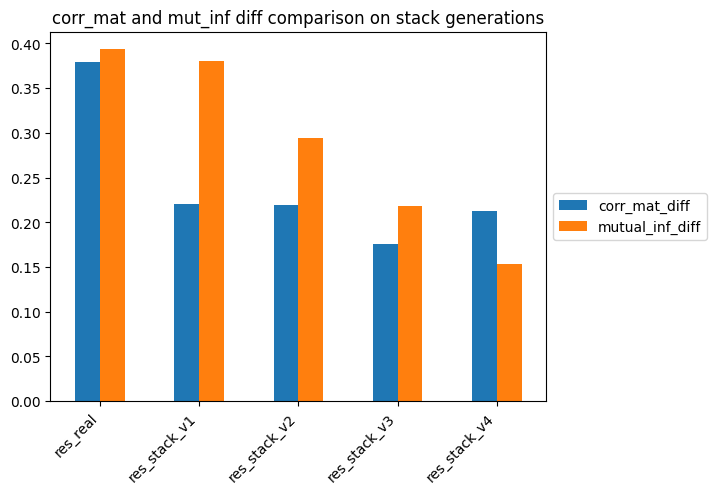

In [34]:
matrix_diff_plot.plot.bar()
plt.title("corr_mat and mut_inf diff comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [35]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  "auroc",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   evals.loc["auroc", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,...,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,auroc,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.023825,0.052905,0.181732,0.000000,0.379164,0.393504,0.077199,0.583333,0.014733,0.016512,...,-0.017366,0.782563,-0.148669,0.062253,0.036765,0.005616,0.000000,0.159664,0.996639,0.475210
res_stack_v1,0.023628,0.001329,0.079519,0.000000,0.220115,0.380647,0.066580,0.666667,0.017918,0.013365,...,-0.002450,0.718697,0.041982,0.029540,0.013130,0.000381,0.003676,0.252101,0.882353,0.488725
res_stack_v2,0.018545,0.002853,0.024722,0.059634,0.219769,0.294074,0.060779,0.750000,0.014398,0.018950,...,-0.002373,0.859506,-0.115599,0.023308,0.010242,0.000118,0.000263,0.080882,0.621429,0.457213
res_stack_v3,0.016076,0.007950,0.043481,0.349712,0.175974,0.217925,0.066768,0.916667,0.010660,0.011695,...,-0.004486,0.923372,-0.058351,0.052489,0.021008,0.000898,0.000788,0.043986,0.394118,0.437421
res_stack_v4,0.018345,0.017256,0.061693,0.000000,0.212965,0.152972,0.065167,1.000000,0.010961,0.008282,...,0.010064,0.891288,0.023405,0.017824,0.019367,0.000777,0.004005,0.093093,0.720168,0.437999


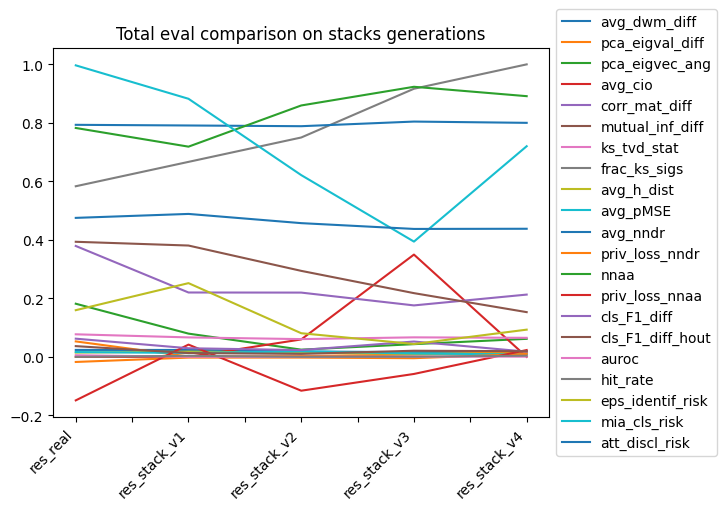

In [36]:
total_eval.plot.line()
plt.title("Total eval comparison on stacks generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [37]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

overall_res

,Stacks,Utility,Privacy
0,res_real,0.801800,0.747763
1,res_stack_v1,0.812447,0.758270
2,res_stack_v2,0.802031,0.811389
3,res_stack_v3,0.804802,0.857556
4,res_stack_v4,0.778622,0.812301


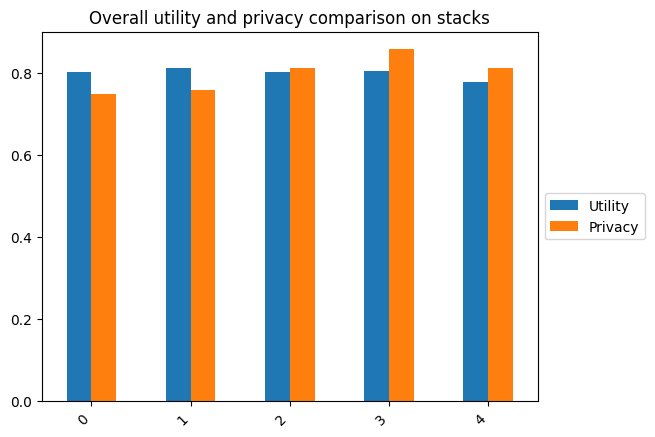

In [38]:
overall_res.plot.bar()
plt.title("Overall utility and privacy comparison on stacks")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Evaluting final stacks compared to real data

In [39]:
eval_results = [res_real, res_stack_v5_on_real, res_stack_synth_only_on_real]
eval_str = ["res_real", "res_stack_v5_on_real", "res_stack_synth_only_on_real"]

In [40]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "hit_rate"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["hit_rate", "val"]]

privacy_plot

,eps_identif_risk,att_discl_risk,hit_rate
res_real,0.159664,0.475210,0.0
res_stack_v5_on_real,0.023109,0.455182,0.0
res_stack_synth_only_on_real,0.024160,0.437675,0.0


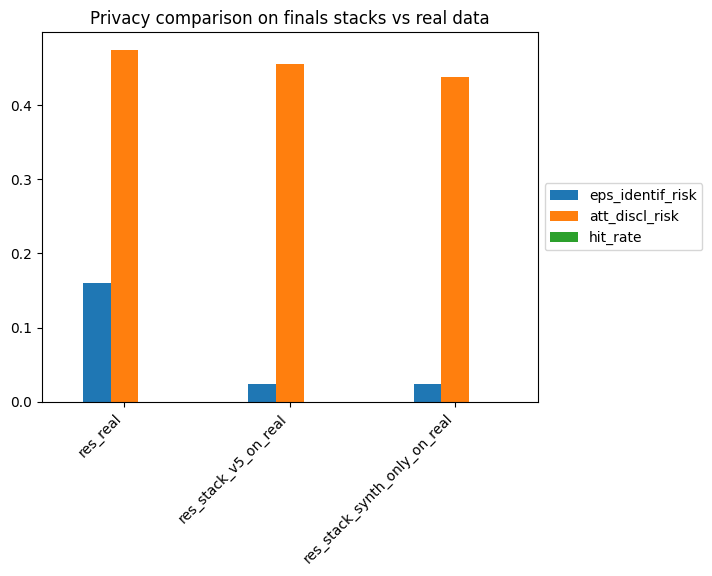

In [41]:
privacy_plot.plot.bar()
plt.title("Privacy comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [42]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "pca_eigval_diff",
                                     "pca_eigvec_ang"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["pca_eigval_diff", "val"],
                                    evals.loc["pca_eigvec_ang", "val"]]

utility_plot

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
res_real,0.023825,0.052905,0.181732
res_stack_v5_on_real,0.028973,0.027991,0.205478
res_stack_synth_only_on_real,0.044473,0.035591,0.168512


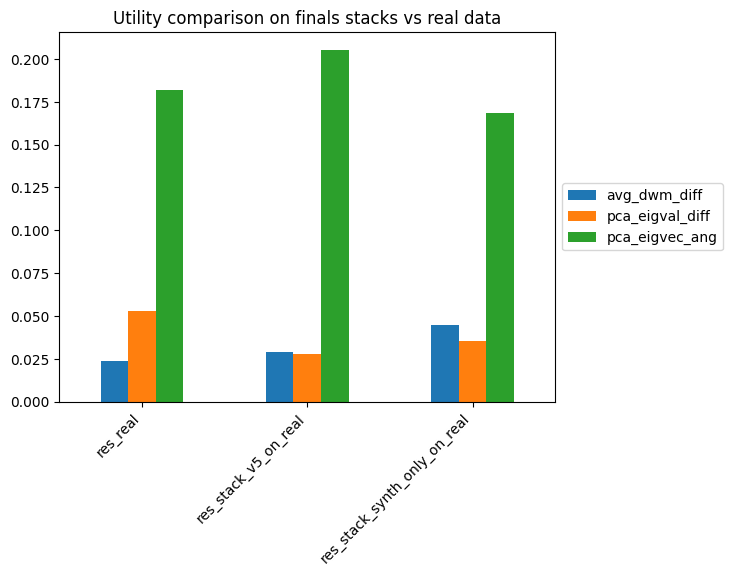

In [43]:
utility_plot.plot.bar()
plt.title("Utility comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [44]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff",
                                     "mutual_inf_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"], 
                                    evals.loc["mutual_inf_diff", "val"]]

matrix_diff_plot

,corr_mat_diff,mutual_inf_diff
res_real,0.379164,0.393504
res_stack_v5_on_real,0.486791,0.765773
res_stack_synth_only_on_real,0.551266,0.786137


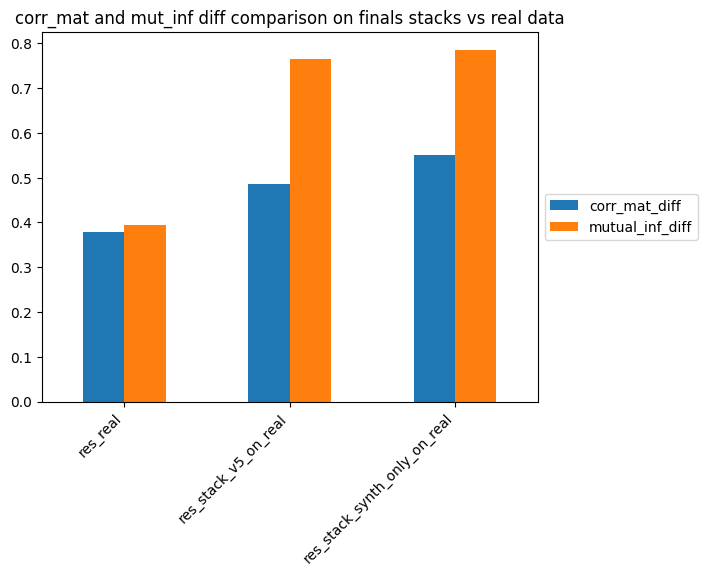

In [45]:
matrix_diff_plot.plot.bar()
plt.title("corr_mat and mut_inf diff comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [46]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  "auroc",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   evals.loc["auroc", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,...,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,auroc,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.023825,0.052905,0.181732,0.000000,0.379164,0.393504,0.077199,0.583333,0.014733,0.016512,...,-0.017366,0.782563,-0.148669,0.062253,0.036765,0.005616,0.0,0.159664,0.996639,0.475210
res_stack_v5_on_real,0.028973,0.027991,0.205478,0.011982,0.486791,0.765773,0.108707,0.750000,0.023811,0.027622,...,-0.002184,0.912500,-0.155497,0.097944,0.027311,0.004580,0.0,0.023109,0.410084,0.455182
res_stack_synth_only_on_real,0.044473,0.035591,0.168512,0.000000,0.551266,0.786137,0.114520,0.833333,0.030679,0.040499,...,0.014102,0.916176,-0.167157,0.083541,0.045168,0.002617,0.0,0.024160,0.203361,0.437675


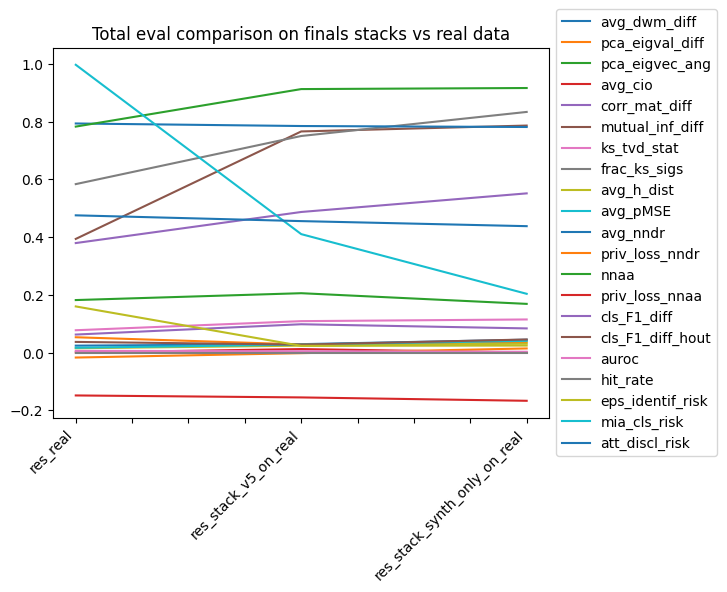

In [47]:
total_eval.plot.line()
plt.title("Total eval comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [48]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

overall_res

,Stacks,Utility,Privacy
0,res_real,0.801800,0.747763
1,res_stack_v5_on_real,0.773949,0.842306
2,res_stack_synth_only_on_real,0.761286,0.866834


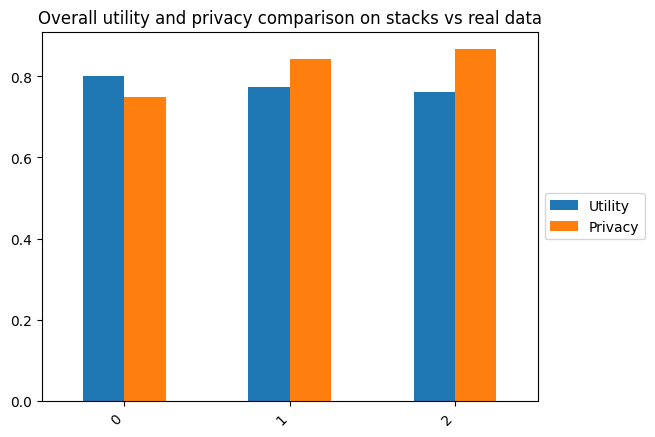

In [49]:
overall_res.plot.bar()
plt.title("Overall utility and privacy comparison on stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()